In [1]:
#Brittany Roberts
#DSC410
#Exercise 11.2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/bellevue-university/dsc410/main/12%20Week/week_8/data/travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [2]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [3]:
numerical_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
categorical_features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Claim', 'Destination', 'Gender']

In [4]:
def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    df[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, str(df[feature_name].describe().round(2).astype(str)), size=17)

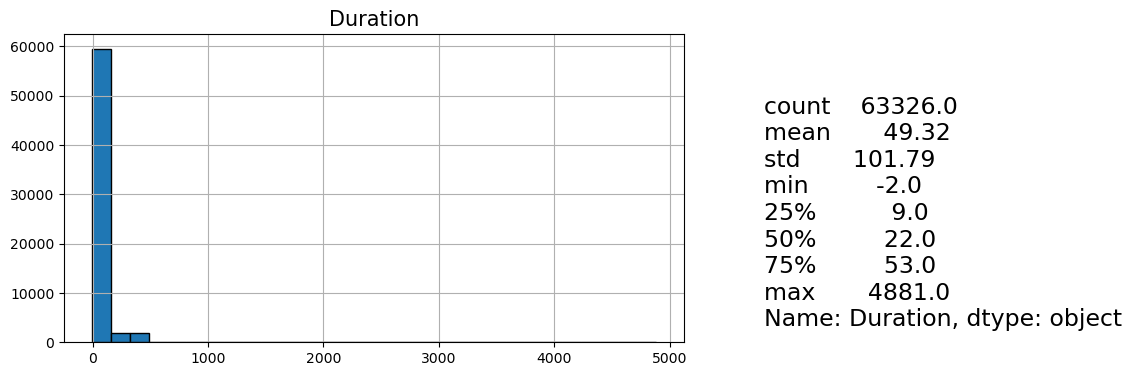

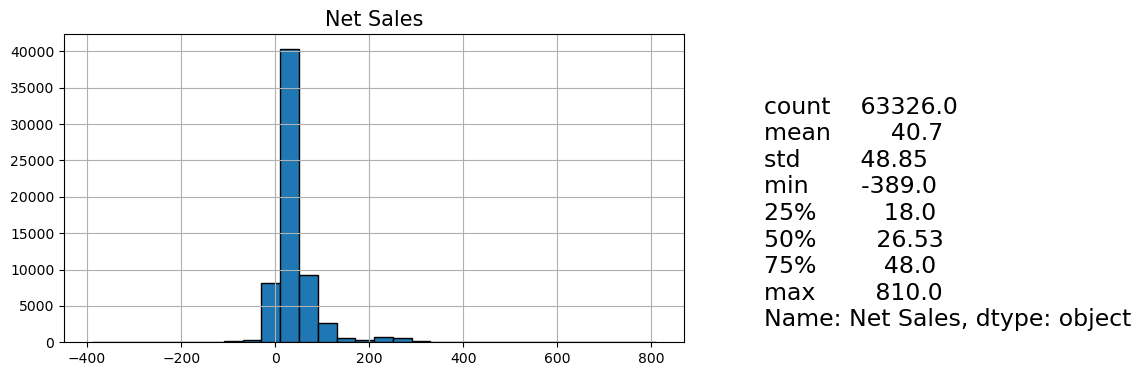

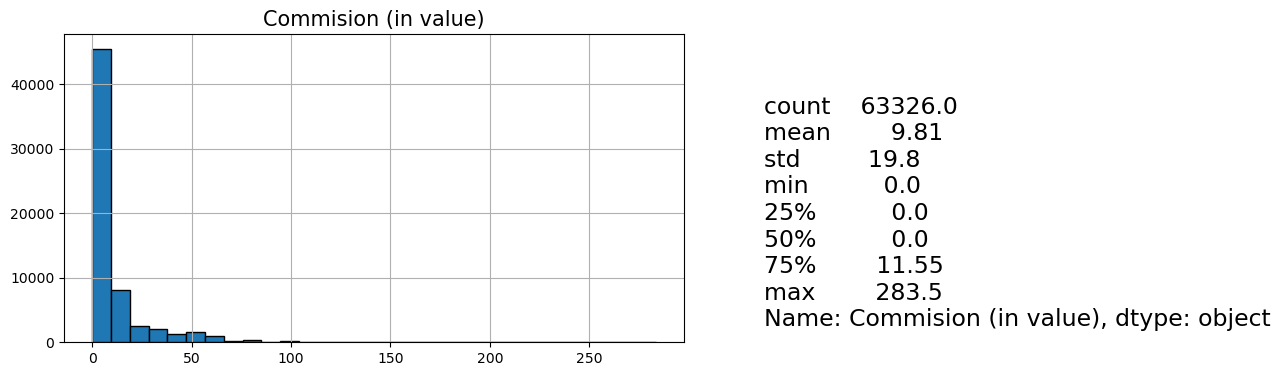

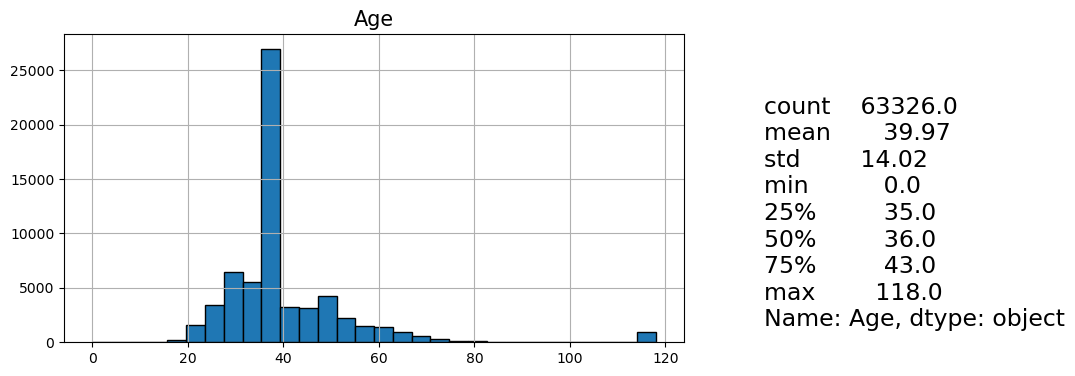

In [5]:
for x in numerical_features:
    desc_num_feature(x)

In [6]:
#Correlation for numerical features

df[numerical_features].corr()

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.429235,0.344772,0.002468
Net Sales,0.429235,1.000000,0.651315,0.037756
Commision (in value),0.344772,0.651315,1.000000,0.118348
Age,0.002468,0.037756,0.118348,1.000000


In [7]:
df.drop(df.columns[[6,9,10]], axis=1, inplace=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value)
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,-29.0,9.57
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,-29.0,9.57
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,-49.5,29.70
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,-39.6,23.76
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,-19.8,11.88
...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,35.0,12.25
63322,JZI,Airlines,Online,Basic Plan,No,58,40.0,14.00
63323,JZI,Airlines,Online,Basic Plan,No,2,18.0,6.30
63324,JZI,Airlines,Online,Basic Plan,No,3,18.0,6.30


In [8]:
df= pd.concat([df, pd.get_dummies(df['Agency'], prefix='agency', drop_first=True)], axis=1)
df= pd.concat([df, pd.get_dummies(df['Agency Type'], prefix='type', drop_first=True)], axis=1)
df= pd.concat([df, pd.get_dummies(df['Distribution Channel'], prefix='dc', drop_first=True)], axis=1)
df= pd.concat([df, pd.get_dummies(df['Product Name'], prefix='product', drop_first=True)], axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['encoded_Claim'] = le.fit_transform(df['Claim'])

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
df['dim_index'] = pca.fit_transform(df[['Duration', 'Net Sales', 'Commision (in value)']])
df.drop(['Duration', 'Net Sales', 'Commision (in value)'],axis=1, inplace=True)

In [11]:
X = df.drop(['Agency', 'Agency Type','Distribution Channel', 'Product Name', 'Claim'], axis=1)
y = np.log(df['encoded_Claim'])

/home/devpc/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
numerical_features = ['dim_index']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:, numerical_features] = scaler.fit_transform(X[numerical_features])

In [13]:
n_input = X.shape[1]
n_hidden1 = 32
n_hidden2 = 16
n_hidden3 = 8

In [14]:
from keras.models import Sequential
from keras.layers import Dense

nn_reg = Sequential()
nn_reg.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))
nn_reg.add(Dense(units=n_hidden2, activation='relu'))
nn_reg.add(Dense(units=n_hidden3, activation='relu'))
# output layer
nn_reg.add(Dense(units=1, activation=None))

2023-11-12 17:57:56.802539: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-12 17:57:56.804558: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-12 17:57:56.829984: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 17:57:56.830017: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 17:57:56.830047: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [ ]:
batch_size = 32
n_epochs = 40
nn_reg.compile(loss='mean_absolute_error', optimizer='adam')
nn_reg.fit(X, y, epochs=n_epochs, batch_size=batch_size)

Epoch 1/40
1979/1979 [==============================] - 2s 1ms/step - loss: inf
Epoch 2/40
1979/1979 [==============================] - 2s 1ms/step - loss: inf
Epoch 3/40
1979/1979 [==============================] - 2s 974us/step - loss: inf
Epoch 4/40
1979/1979 [==============================] - 2s 1ms/step - loss: inf
Epoch 5/40
1979/1979 [==============================] - 2s 1ms/step - loss: inf
Epoch 6/40
 973/1979 [=============>................] - ETA: 1s - loss: inf

In [ ]:
nn_reg.save("./Model/diamond-prices-model.keras")

In [ ]:
from keras.models import load_model

model = load_model('./Model/diamond-prices-model.keras')
model.make_predict_function()

In [ ]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
import os

## Div for Duration
input_duration = dcc.Input(
    id='Duration',
    type='number',
    value=0)

div_duration = html.Div(
        children=[html.H3('Duration:'), input_duration],
        className="four columns"
        )

In [ ]:
## Div for Net Sales
input_sales = dcc.Input(
    id='Net Sales',
    type='number',
    value=-400)

div_sales = html.Div(
        children=[html.H3('Net Sales:'), input_sales],
        className="four columns"
        )

In [ ]:
## Div for Commision
input_commision = dcc.Input(
    id='Comission (in value)',
    type='number',
    value=0)

div_commision = html.Div(
        children=[html.H3('Commision:'), input_commision],
        className="four columns"
        )

In [ ]:
# Div for Agency Type
type_values = ['Travel Agency', 'Airlines']
type_options = [{'label': x, 'value': x} for x in type_values]
input_type = dcc.Dropdown(
    id='Agency Type',
    options = type_options,
    value = 'Airlines'
    )

div_type = html.Div(
        children=[html.H3('Agency Type:'), input_type],
        className="four columns"
        )

In [ ]:
# Div for Agency
agency_values = ['EPX', 'CWT', 'C2B', 'JZI', 'SSI', 'JWT', 'RAB', 'LWC', 'TST', 'KML', 'ART', 'CCR', 'CBH', 'TTW', 'CSR', 'ADM']
agency_options = [{'label': x, 'value': x} for x in agency_values]
input_agency = dcc.Dropdown(
    id='Agency',
    options = agency_options,
    value = 'EPX'
    )

div_agency = html.Div(
        children=[html.H3('Agency:'), input_agency],
        className="four columns"
        )

In [ ]:
# Div for Distrubtion Channel
dc_values = ['Online', 'Offline']
dc_options = [{'label': x, 'value': x} for x in dc_values]
input_dc = dcc.Dropdown(
    id='Distribtuion Channel',
    options = dc_options,
    value = 'Online'
    )

div_dc = html.Div(
        children=[html.H3('Distribution Channel:'), input_dc],
        className="four columns"
        )

In [ ]:
# Div for Product Name
product_values = ['Cancellation Plan', '2 way Comprehensive Plan', 'Rental Vehicle Excess Insurance', 'Basic Plan', 'Bronze Plan', '1 way Comprehensive Plan', 'Value Plan',
                  'Silver Plan', 'Annual Silver Plan', 'Ticket Protector', 'Travel Cruise Protect', 'Comprehensive Plan', 'Gold Plan', '24 Protect', 
                  'Single Trip Travel Protect Gold', 'Annual Gold Plan', 'Premier Plan', 'Single Trip Travel Protect Silver', 'Annual Travel Protect Gold', 
                  'Annual Travel Protect Silver', 'Individual Comprehensive Plan', 'Single Trip Travel Protect Platinum', 'Annual Travel Protect Platinum', 
                  'Spouse or Parents Comprehensive Plan', 'Child Comprehensive Plan', 'Travel Cruise Protect Family']
product_options = [{'label': x, 'value': x} for x in product_values]
input_product = dcc.Dropdown(
    id='Product Name',
    options = product_options,
    value = 'Cancellation Plan'
    )

div_product = html.Div(
        children=[html.H3('Product Name:'), input_product],
        className="four columns"
        )

In [ ]:
## Div for numerical characteristics
div_numerical = html.Div(
        children = [div_duration, div_sales, div_commision],
        className="row"
        )

In [ ]:
## Div for categorical
div_categorical = html.Div(
        children = [div_agency, div_type, div_product, div_dc],
        className="row"
        )

In [ ]:
def get_prediction(Agency, Agency_Type, Distribution_Channel, Product_Name, Duration, Net_Sales, Commision):
    '''takes the inputs from the user and produces the claim prediction'''
    
    cols = ['Duration', 'Commision (in value)', 'Net Sales', 'type_Travel Agency', 'type_Airlines', 'agency_EPX', 'agency_CWT', 'agency_C2B', 'agency_JZI', 'agency_SSI', 
            'agency_JWT', 'agency_RAB', 'agency_LWC', 'agency_TST', 'agency_KML', 'agency_ART', 'agency_CCR', 'agency_CBH', 'agency_TTW', 'agency_CSR', 'agency_ADM',
            'product_Cancellation Plan', 'product_2 way Comprehensive Plan', 'product_Rental Vehicle Excess Insurance', 'product_Basic Plan', 'product_Bronze Plan', 
            'product_1 way Comprehensive Plan', 'product_Value Plan', 'product_Silver Plan', 'product_Annual Silver Plan', 'product_Ticket Protector', 
            'product_Travel Cruise Protect', 'product_Comprehensive Plan', 'product_Gold Plan', 'product_24 Protect', 'product_Single Trip Travel Protect Gold', 
            'product_Annual Gold Plan', 'product_Premier Plan', 'product_Single Trip Travel Protect Silver', 'product_Annual Travel Protect Gold', 
            'product_Annual Travel Protect Silver', 'Individual Comprehensive Plan', 'product_Single Trip Travel Protect Platinum', 'product_Annual Travel Protect Platinum', 
            'product_Spouse or Parents Comprehensive Plan', 'product_Child Comprehensive Plan', 'product_Travel Cruise Protect Family', 'dc_Online', 'dc_Offline']

    agency_dict = {x: 'agency_' + x for x in agency_values[1:]}
    dc_dict = {x: 'dc_' + x for x in dc_values[1:]}
    produt_dict = {x: 'product_' + x for x in product_values[1:]}
    type_dict = {x: 'type_' + x for x in type_values[1:]}
    
    ## produce a dataframe with a single row of zeros
    df2 = pd.DataFrame(data = np.zeros((1,len(cols))), columns = cols)
    
    ## get the numeric characteristics
    df.loc[0,'Duration'] = Duration
    df.loc[0,'Net Sales'] = Net_Sales
    df.loc[0,'Commision (in value)'] = Commision
    
    ## transform dimensions into a single dim_index using PCA
    dims_df = pd.DataFrame(data=[[Duration, Net_Sales, Commision]], columns=['Duration','Commision (in value)','Net Sales'])
    df.loc[0,'dim_index'] = pca.transform(dims_df).flatten()[0]
    
    ## Use the one-hot encoding for the categorical features
    if Agency!='EPX':
        df.loc[0, agency_dict[Agency]] = 1
    
    if Product!='Cancellation Plan':
        df.loc[0, product_dict[Product_Name]] = 1
    
    if Distribution_Channel!= 'Offline':
        df.loc[0, dc_dict[Distribution_Channel]] = 1
        
    if Agency_Type!= 'Airlines':
        df.loc[0, type_dict[Agency_Type ]] = 1
    
    ## Scale the numerical features using the trained scaler
    numerical_features = ['Duration', 'Net Sales', 'Commision (in values)']
    df.loc[:,numerical_features] = scaler.transform(df.loc[:,numerical_features])
    
    ## Get the predictions using our trained neural network
    prediction = model.predict(df.values).flatten()[0]
    
    ## Transform the log-prices to prices
    prediction = np.exp(prediction)
   
    return int(prediction)

In [ ]:
from dash.dependencies import Input, Output

app = dash.Dash(__name__)
app.css.append_css({
    'external_url': 'https://codepen.io/chriddyp/pen/bWLwgP.css'
})


## App layout
app.layout = html.Div([
        html.H1('Predict Possibility of Customer Reporting a Claim'),
        
        html.H2('Enter the details of policy to predict whether a claim will be filed.'),
        
        html.Div(
                children=[div_numerical, div_categorical]
                ),
        html.H1(id='output',
                style={'margin-top': '50px', 'text-align': 'center'})
        ])

predictors = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Duration', 'Net Sales', 'Commision (in value)']
@app.callback(
        Output('output', 'children'),
        [Input(x, 'value') for x in predictors])
def show_prediction(Agency, Agency_Type, Distribution_Channel, Product_Name, Duration, Net_Sales, Commision): 
    pred = get_prediction(Agency, Agency_Type, Distribution_Channel, Product_Name, Duration, Net_Sales, Commision)
    return str("Predicted Claim: {:,}".format(pred))

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False)